# Data Exploration and Data Cleaning( From cell 54)


In [110]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [111]:
data = pd.read_csv('card transactions.csv')

In [112]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [113]:
print(mem_usage(data))

39.51 MB


In [114]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
data.shape

(96753, 18)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        0 non-null      float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        0 non-null      float64
 16  Unnamed: 16        0 n

In [117]:
data['Date']=pd.to_datetime(data['Date'])

In [118]:
data_numeric = data.iloc[: , [2,8]].copy()
data_numeric.head()

,Date,Amount
0,2010-01-01,3.62
1,2010-01-01,31.42
2,2010-01-01,178.49
3,2010-01-01,3.62
4,2010-01-01,3.62


In [119]:
print(data_numeric['Amount'].min())
print(data_numeric['Amount'].max())
print(data_numeric['Amount'].mean())
print(data_numeric['Amount'].std())

0.01
3102045.53
427.8856774466942
10006.140301904436


In [120]:
print(data_numeric['Date'].min())
print(data_numeric['Date'].max())

2010-01-01 00:00:00
2010-12-31 00:00:00


In [121]:
data = data.iloc[: , [0,1,2,3,4,5,6,7,8,9]].copy()

In [ ]:
data.head()

In [ ]:
data.info()

In [133]:
def count_zeros(df_cleaned):
    count=0
    for i in df_cleaned:
        if i==0:
            count+=1
    return count

In [135]:
statistics_of_data = []
for col in ["Recnum","Cardnum","Date","Merchnum","Merch description","Merch state","Merch zip","Transtype","Amount","Fraud"]:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.2f}%',  # change made here
                             count_zeros(data[col]),
                             data[col].nunique(),
                            data[col].mode()[0]
                            
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,categorical,96753,100.00%,0,96753,1
1,Cardnum,categorical,96753,100.00%,0,1645,5142148452
2,Date,categorical,96753,100.00%,0,365,2010-02-28 00:00:00
3,Merchnum,categorical,93378,96.51%,0,13091,930090121224
4,Merch description,categorical,96753,100.00%,0,13126,GSA-FSS-ADV
5,Merch state,categorical,95558,98.76%,0,227,TN
6,Merch zip,categorical,92097,95.19%,0,4567,38118.0
7,Transtype,categorical,96753,100.00%,0,4,P
8,Amount,categorical,96753,100.00%,0,34909,3.62
9,Fraud,categorical,96753,100.00%,95694,2,0


In [15]:
# numericals=["Date",'Amount']
# categoricals=["Recnum ","Cardnum","Merchnum ","Merch description","Merch state","Merch zip ","Transtype ","Fraud"]

In [36]:
data.shape

(96753, 10)

In [37]:
import matplotlib.pylab as py
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
py.rcParams.update(params)


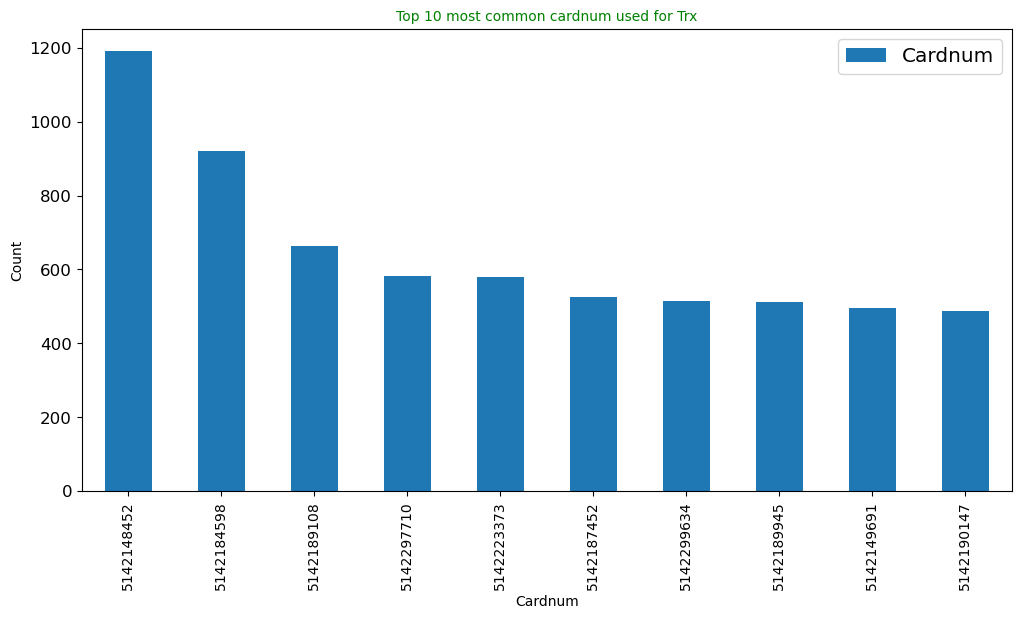

In [38]:
data['Cardnum'].value_counts().head(10).plot(kind = 'bar',figsize=(12,6),)
plt.xlabel('Cardnum',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.savefig('1.png',bbox_inches='tight')
plt.title(label="Top 10 most common cardnum used for Trx",
          fontsize=10,
          color="green")
plt.legend(loc="upper right")
plt.xticks(fontsize=10)
plt.show()


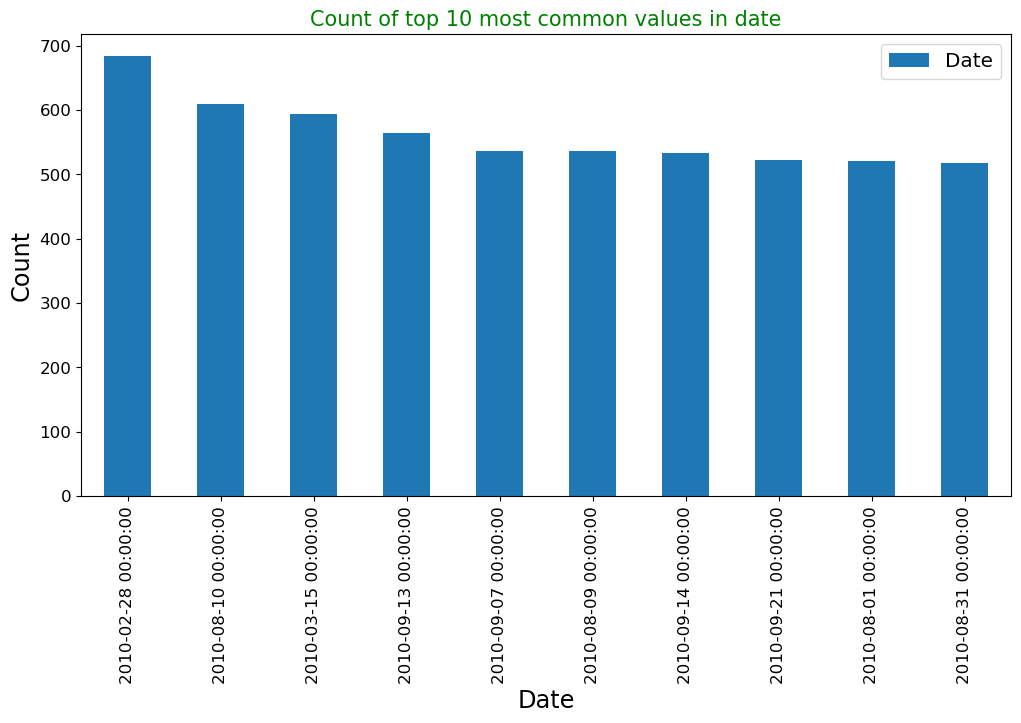

In [39]:
data_numeric['Date'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('02Date.png',bbox_inches='tight')
plt.title(label="Count of top 10 most common values in date",
          fontsize=15,
          color="green")
plt.legend(loc="upper right")
plt.show()


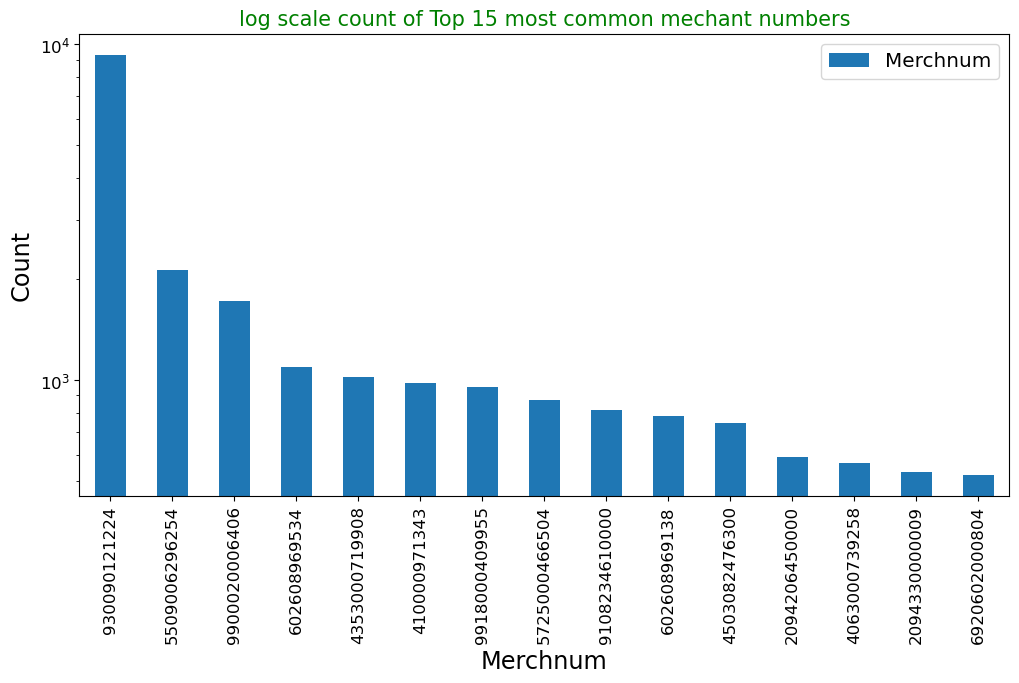

In [40]:
data['Merchnum'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merchnum')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('03Merchnum.png',bbox_inches='tight')
plt.title(label="log scale count of Top 15 most common mechant numbers",
          fontsize=15,
          color="green")
plt.legend(loc="upper right")
plt.show()

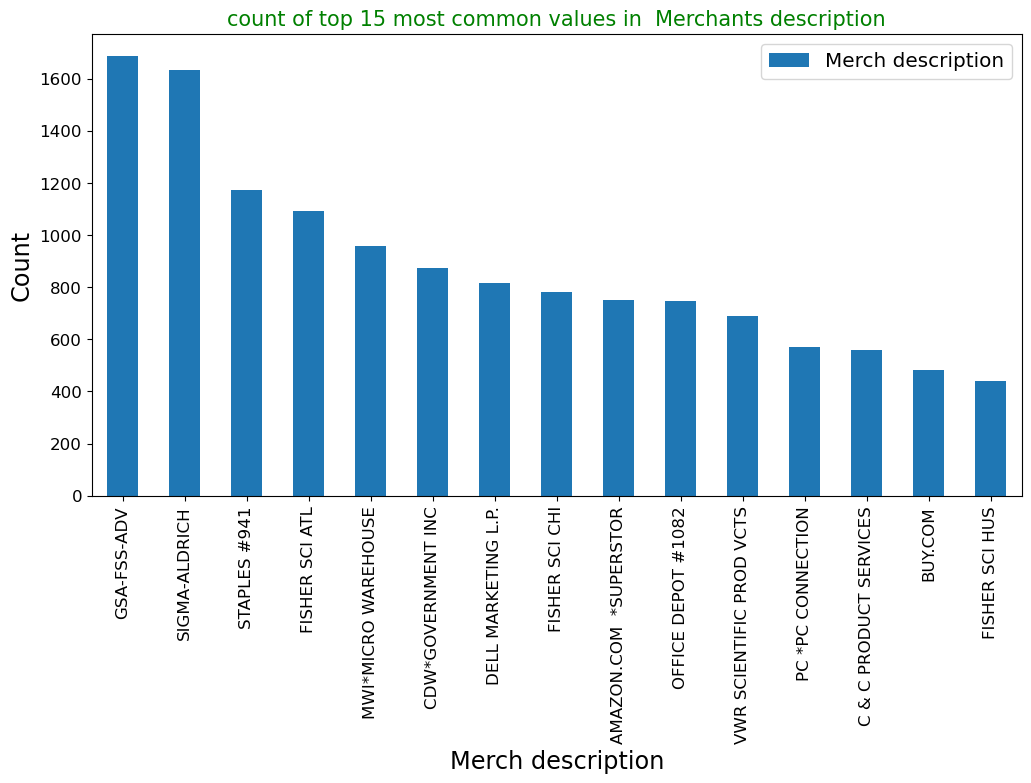

In [41]:
data['Merch description'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merch description')
plt.ylabel('Count')
plt.savefig('04Merch description.png',bbox_inches='tight')
plt.title(label="count of top 15 most common values in  Merchants description",
          fontsize=15,
          color="green")
plt.legend(loc="upper right")
plt.show()


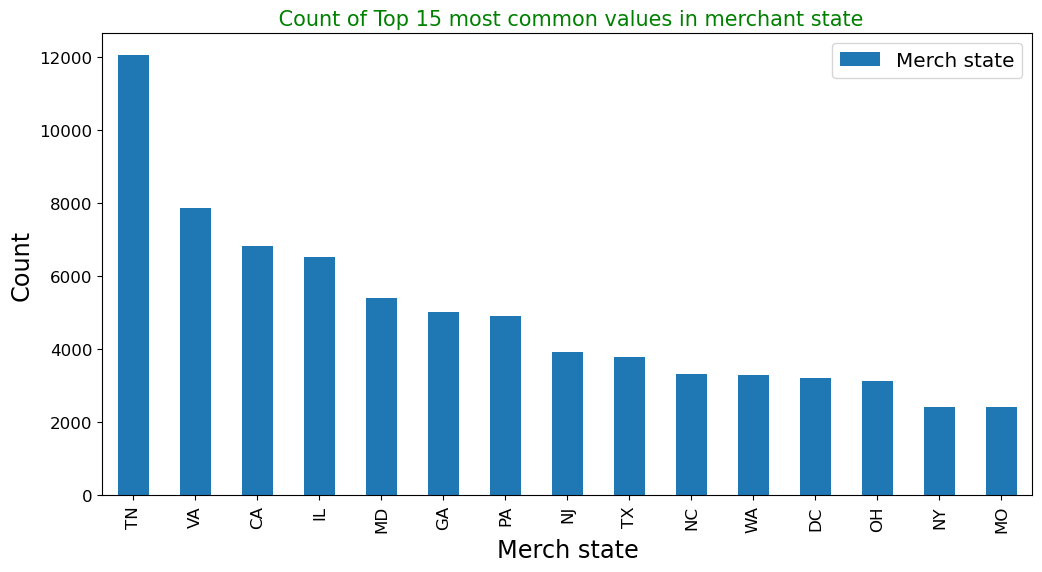

In [42]:
data['Merch state'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merch state')
plt.ylabel('Count')
plt.savefig('05Merch state.png',bbox_inches='tight')
plt.title(label=" Count of Top 15 most common values in merchant state",
          fontsize=15,
          color="green")
plt.legend(loc="upper right")
plt.show()

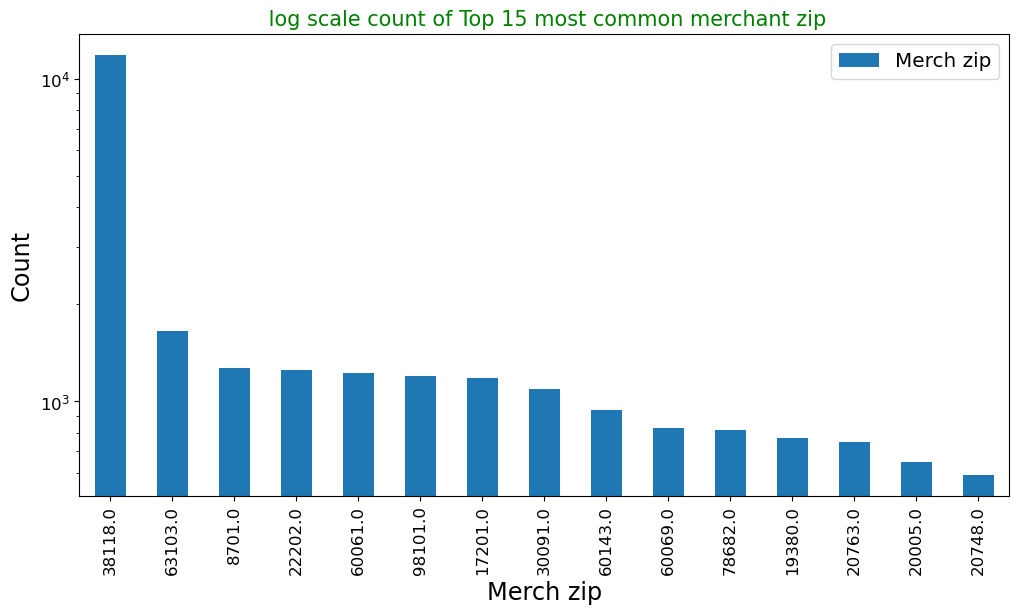

In [43]:
data['Merch zip'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merch zip')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('06Merch zip.png',bbox_inches='tight')
plt.title(label=" log scale count of Top 15 most common merchant zip",
          fontsize=15,
          color="green")
plt.legend(loc="upper right")
plt.show()

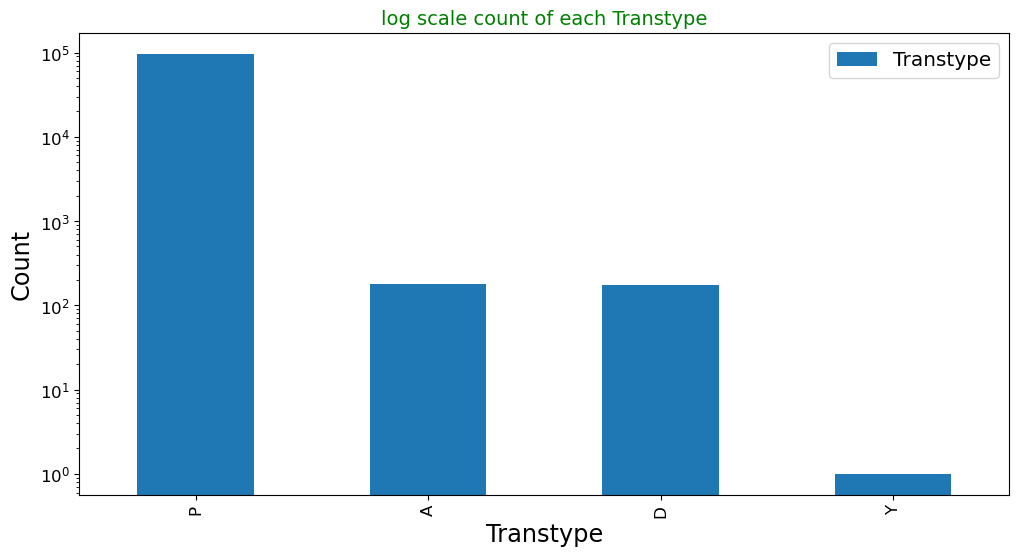

In [44]:
data['Transtype'].value_counts().plot(kind = 'bar')
plt.xlabel('Transtype')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('07Transtype.png',bbox_inches='tight')
plt.title(label="log scale count of each Transtype",
          fontsize=14,
          color="green")
plt.legend(loc="upper right")
plt.show()

In [45]:
import warnings
warnings.filterwarnings('ignore')


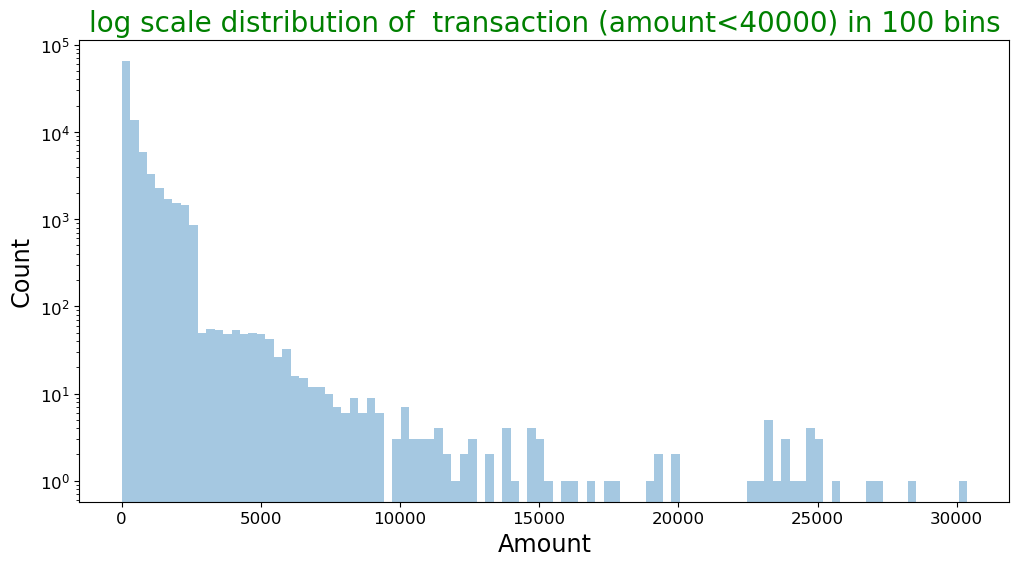

In [46]:
floor = 40000
amount = data_numeric[data_numeric['Amount'] <= floor]
sns.distplot(amount['Amount'],bins = 100, kde = False)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.yscale('log')
plt.title(label="log scale distribution of  transaction (amount<40000) in 100 bins",
          fontsize=20,
          color="green")


plt.savefig('08Amount.png',bbox_inches = 'tight')


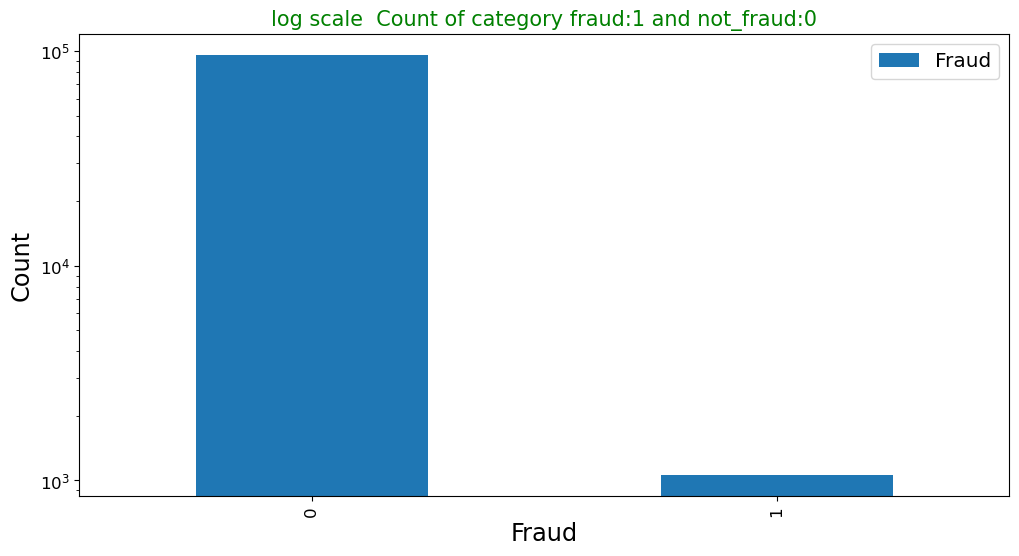

In [47]:
data['Fraud'].value_counts().plot(kind = 'bar')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim()
plt.savefig('09Fraud.png',bbox_inches='tight')
plt.title(label="log scale  Count of category fraud:1 and not_fraud:0",
          fontsize=15,
          color="green")
plt.legend(loc="upper right")
plt.show()

In [48]:
data['Fraud'].sum()

1059

In [49]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]

In [50]:
numrecords = len(data)
print(numrecords)

96753


In [51]:
print("goods-->",len(goods))
print("bads--->",len(bads))
print("numrecords",len(goods) + len(bads))

goods--> 95694
bads---> 1059
numrecords 96753


In [52]:
len(data_numeric['Date'].unique())

365

<AxesSubplot: title={'center': 'Daily transcations'}, xlabel='Date'>

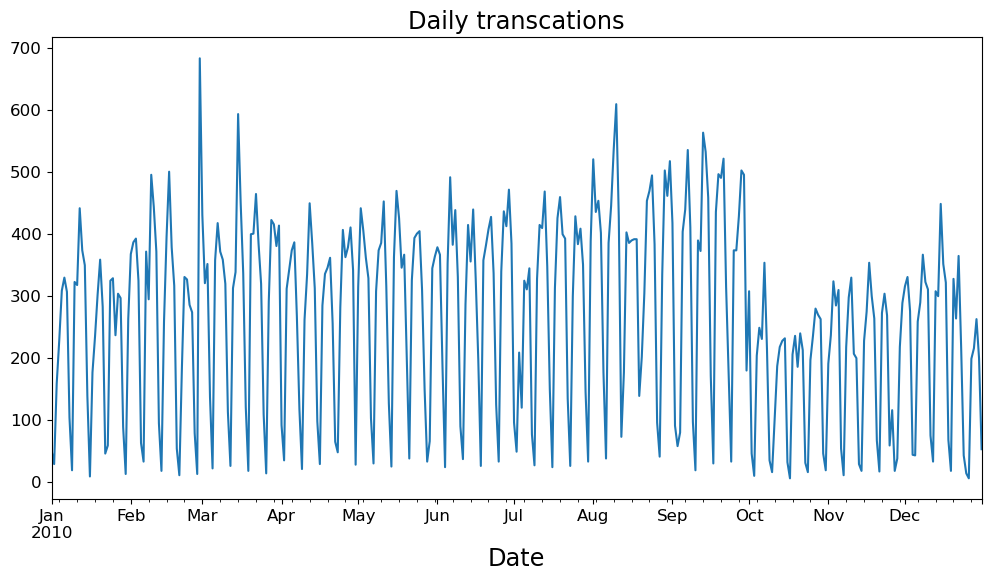

In [53]:
daily_count = data_numeric.assign(trx = np.ones(numrecords)).set_index(data_numeric['Date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily transcations')




# Data cleaning

In [54]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [55]:
data.shape

(96753, 10)

#  Keeping records with "P" in the Transtype data field only.

In [56]:
data_P = data[data['Transtype'] == 'P']
print(len(data_P))
data_P.head()

96398


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


# Removing the frivolous values in Amount column
# Get the index of the row containing the maximum value in 

In [57]:
df=data_P.copy()

In [58]:

max_row_index = df['Amount'].idxmax()

In [59]:
max_row_index

52714

In [60]:
df.loc[df['Recnum']==52715]


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
52714,52715,5142189135,2010-07-13,NaN,INTERMEXICO,NaN,NaN,P,3102045.53,0


In [61]:

df.drop(index=52714,inplace=True,axis=0)


In [62]:
df.loc[data_P['Recnum']==52715]


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud


In [63]:
count_P = (df['Transtype'] == 'P').sum()
print('Number of records with Transtype P:', count_P)


Number of records with Transtype P: 96397


In [64]:
# •Build many candidate variables for Project 2, as many as you can.


# •Clean the data first: Keep only P’s, remove one outlier,
#fill in missing fields.

# •Include one risk table variable: likelihood of fraud for that

#day of the week. Don’t use the OOT data to calculate the risk table.
# •Include two Benford’s law variables, one for Cardnum and
#one for Merchnum.

# •Submit your code and a short word document with (1) a
#high-level summary of the imputation logic and (2) a summary
#table of variables you created, similar to HW3. Include the
#total number of variables created.

# •The more variables the better. The more variety the better.
# •Please try to invent new kinds of variables, not just
#new entities. If you do this make sure you describe any 
#new variables well and note that they are new (for the graders).
# •HW8 due 3/6

#  Using US zip codes dataset from : https://simplemaps.com/data/us-zips

# To form  dictionary to map (zip code as key state_id as values) 

In [65]:
# Fill missing values using zip codes database

zip_codes = pd.read_csv('uszips.csv')
zip_codes.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [66]:
zip_codes.shape

(33790, 18)

In [67]:
zip_codes['zip_new'] = zip_codes.zip.astype('float64') 

### To form dictionary to map (zip code as key state_id as values) in zip_dict


In [68]:

zip_dict = {zip_code: state_id for zip_code, state_id in zip(zip_codes.zip_new.values, zip_codes.state_id.values)}


In [69]:
count = 0
for key, value in zip_dict.items():
    print(key, value)
    count += 1
    if count == 5:
        break

601.0 PR
602.0 PR
603.0 PR
606.0 PR
610.0 PR


#  Data Cleaning in Merch State which has 1194 missing values

In [70]:
df0=df.copy()

In [71]:
print(len(df0.loc[df0['Merch state'].isna()]))


1020


In [72]:

# filling the missing value using zip_dict which has zip as key  state_id as value to map  the "Merch state" datafield

df0['Merch state'].fillna(df0['Merch zip'].map(zip_dict), inplace=True)
print(df0['Merch state'].isna().sum())



980


In [73]:
# Filter for non-null 'Merch zip' values
mask = df0['Merch zip'].notnull()
zip_notnull = df0.loc[mask, ['Merch zip', 'Merch state']]

# Fill missing 'Merch state' values with the mode within each 'Merch zip' group
zip_notnull['Merch state'] = zip_notnull.groupby('Merch zip')['Merch state'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

# Map the mode values back to the original dataframe

zip_state_dict = pd.Series(zip_notnull['Merch state'].values, index=zip_notnull['Merch zip']).to_dict()
df0['Merch state'] = df0['Merch state'].fillna(df0['Merch zip'].map(zip_state_dict))

# Check the number of remaining missing values
print(len(df0.loc[df0['Merch state'].isna()]))


963


In [74]:
#function= lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
df0['Merch state1'] = df0.groupby(['Cardnum','Date'])['Merch state'].transform(function) 
len(df0.loc[df0['Merch state1'].isna()])



636

In [75]:
# Groupby Merch description, then find the mode of the state
function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)


df0['Merch state2'] = df0.groupby(['Merch description'])['Merch state1'].transform(function) 
len(df0.loc[df0['Merch state2'].isna()])


134

In [76]:
# Groupby Cardnm, then find the mode of the state
function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df0['Merch state3'] = df0.groupby(['Cardnum'])['Merch state2'].transform(function) 
len(df0.loc[df0['Merch state3'].isna()])



31

In [77]:
# filling remaining missing values with Recum
df0['Merch state4'] = df0['Merch state3'].fillna(df0['Recnum'])
missing_values1 = df0['Merch state4'].isnull().sum()
missing_values1

0

# filling missing values in Merch zip column  which has 4655 missing values

In [78]:
df0.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Merch state1,Merch state2,Merch state3,Merch state4
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,TN,TN,TN,TN
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,MA,MA,MA,MA
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,MD,MD,MD,MD
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,TN,TN,TN,TN
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,TN,TN,TN,TN


In [79]:
df1=df0.copy()

In [80]:
print(len(df1.loc[df1['Merch zip'].isna()]))


4300


In [81]:
function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

mask = df1['Merchnum'].notnull()
merch_notnull = df1.loc[mask, ['Merchnum', 'Merch state4','Merch zip']]

# Fill missing 'Merch state' values with the mode within each 'Merch zip' group
merch_notnull['Merch zip'] = merch_notnull.groupby(['Merchnum', 'Merch state4'])['Merch zip'].transform(function)

# Map the mode values back to the original dataframe

merch_state_dict = pd.Series(merch_notnull['Merch zip'].values, index=merch_notnull['Merchnum']).to_dict()
df1['Merch zip'] = df1['Merch zip'].fillna(df1['Merchnum'].map(merch_state_dict))

# Check the number of remaining missing values
print(len(df1.loc[df1['Merch zip'].isna()]))


2474


In [82]:
count = 0
for key, value in merch_state_dict.items():
    print(key, value)
    count += 1
    if count == 5:
        break

5509006296254 38118.0
61003026333 1803.0
4503082993600 20706.0
6098208200062 45429.0
602608969534 30091.0


In [83]:
# Groupby fully filled Merch state, then find the mode of the Merch zip 

function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df1['Merch zip1'] = df1.groupby(['Cardnum','Date'])['Merch zip'].transform(function) 
len(df1.loc[df1['Merch zip1'].isna()])


1628

In [84]:
#Groupby Merch description, then the fully filled state  then find the mode of the zip


function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df1['Merch zip2'] = df1.groupby(['Merch description','Merch state4'])['Merch zip1'].transform(function) 
len(df1.loc[df1['Merch zip2'].isna()])



353

In [85]:
function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df1['Merch zip3'] = df1.groupby(['Merch state4'])['Merch zip2'].transform(function) 
len(df1.loc[df1['Merch zip3'].isna()])


31

In [86]:
df1['Merch zip4'] = df1['Merch zip3'].fillna(df1['Recnum'])
missing_values = df1['Merch zip4'].isnull().sum()
missing_values

0

# filling missing value in Merchnum which has missing values

In [87]:
df1.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Merch state1,Merch state2,Merch state3,Merch state4,Merch zip1,Merch zip2,Merch zip3,Merch zip4
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,TN,TN,TN,TN,38118.0,38118.0,38118.0,38118.0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,MA,MA,MA,MA,1803.0,1803.0,1803.0,1803.0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,MD,MD,MD,MD,20706.0,20706.0,20706.0,20706.0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,TN,TN,TN,TN,38118.0,38118.0,38118.0,38118.0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,TN,TN,TN,TN,38118.0,38118.0,38118.0,38118.0


In [88]:
df2=df1.copy()

In [89]:
print(len(df2.loc[df2['Merchnum'].isna()]))

3198


In [90]:
# convert the values of "0" in the Merchnum data field to "NaN" values
df2['Merchnum0'] = df2['Merchnum'].replace('0', np.nan)
print(len(df2.loc[df2['Merchnum0'].isna()])) # Look at the new number of records with "NaN" values

3251


In [91]:
#Groupby Merch description, then the fully filled zip , then find the mode of the Merchnum
function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df2['Merchnum1'] = df2.groupby(['Merch description','Merch zip4'])['Merchnum0'].transform(function) 
len(df2.loc[df2['Merchnum1'].isna()])


2177

In [92]:
# Groupby Merch description, then the fully filled state , then find the mode of the Merchnum

function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df2['Merchnum2'] = df2.groupby(['Merch description','Merch state4'])['Merchnum1'].transform(function) 
len(df2.loc[df2['Merchnum2'].isna()])



2109

In [93]:
df2['Merchnum3'] = df2.groupby(['Merch description'])['Merchnum2'].transform(function) 
len(df2.loc[df2['Merchnum3'].isna()])


2094

In [94]:
function=lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)

df2['Merchnum4'] = df2.groupby(['Merch state4'])['Merchnum3'].transform(function) 
len(df2.loc[df2['Merchnum4'].isna()])


48

In [95]:
df2['Merchnum5'] = df2.groupby(['Merch zip4'])['Merchnum4'].transform(function) 
len(df2.loc[df2['Merchnum5'].isna()])


28

In [96]:
df2['Merchnum6'] = df2['Merchnum5'].fillna(df2['Recnum'])
missing_values = df2['Merchnum6'].isnull().sum()
missing_values

0

In [97]:
df2.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Merch zip2,Merch zip3,Merch zip4,Merchnum0,Merchnum1,Merchnum2,Merchnum3,Merchnum4,Merchnum5,Merchnum6
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,38118.0,38118.0,38118.0,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,1803.0,1803.0,1803.0,61003026333,61003026333,61003026333,61003026333,61003026333,61003026333,61003026333
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,20706.0,20706.0,20706.0,4503082993600,4503082993600,4503082993600,4503082993600,4503082993600,4503082993600,4503082993600
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,38118.0,38118.0,38118.0,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,38118.0,38118.0,38118.0,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254,5509006296254


In [98]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [99]:
df_cleaned=df.copy()

In [100]:
df_cleaned['Merch state']=df2['Merch state4']
print(len(df_cleaned.loc[df_cleaned['Merch state'].isna()]))

0


In [101]:
df_cleaned['Merch zip']=df2['Merch zip4']
print(len(df_cleaned.loc[df_cleaned['Merch zip'].isna()]))

0


In [102]:
df_cleaned['Merchnum']=df2['Merchnum6']
print(len(df_cleaned.loc[df_cleaned['Merchnum'].isna()]))

0


In [103]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  float64       
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 8.1+ MB


In [104]:
df_cleaned['Merch zip'] = df_cleaned['Merch zip'].astype('int64') 

In [105]:
df_cleaned['Merch description'] = df_cleaned['Merch description'].str.upper()

In [106]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  int64         
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 8.1+ MB


In [107]:
## saving cleaned data into csv file
df_cleaned.to_csv('final_cleaned_data.csv',index=False)

In [108]:
def count_zeros(df_cleaned):
    count=0
    for i in df_cleaned:
        if i==0:
            count+=1
    return count

In [109]:
statistics_of_data = []
for col in ["Recnum","Cardnum","Date","Merchnum","Merch description","Merch state","Merch zip","Transtype","Amount","Fraud"]:
    statistics_of_data.append((col,
                             'categorical',
                             df_cleaned[col].notnull().sum(),
                             f'{df_cleaned[col].notnull().sum()/df_cleaned.shape[0]*100}%',
                             count_zeros(df_cleaned[col]),
                             df_cleaned[col].nunique(),
                            df_cleaned[col].mode()[0]
                            
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df



,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,categorical,96397,100.0%,0,96397,1
1,Cardnum,categorical,96397,100.0%,0,1643,5142148452
2,Date,categorical,96397,100.0%,0,365,2010-02-28 00:00:00
3,Merchnum,categorical,96397,100.0%,0,13117,930090121224
4,Merch description,categorical,96397,100.0%,0,12964,GSA-FSS-ADV
5,Merch state,categorical,96397,100.0%,0,91,TN
6,Merch zip,categorical,96397,100.0%,0,4595,38118
7,Transtype,categorical,96397,100.0%,0,1,P
8,Amount,categorical,96397,100.0%,0,34888,3.62
9,Fraud,categorical,96397,100.0%,95338,2,0
